In [4]:
#Imports needed

#Data Manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Train Test Split
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/TitanicFE/Titanic.csv


In [5]:
#Reading the data
t = pd.read_csv('/kaggle/input/TitanicFE/Titanic.csv')

In [6]:
#Checking the head of the data
t.head()

,PassengerId,Survived,Class,Name,Gender,Age,Siblings,Parents,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Without Feature engineering

In [7]:
#Drop all values our model can't accept
X = t.drop(['Survived','Name','Gender','Age','Ticket','Cabin','Embarked'],axis=1)
y = t['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=462)

In [9]:
#Using Logistic Regression
lr = LogisticRegression(solver='liblinear',random_state=462)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       0.70      0.80      0.74       115
           1       0.51      0.38      0.43        64

    accuracy                           0.65       179
   macro avg       0.60      0.59      0.59       179
weighted avg       0.63      0.65      0.63       179


Confusion Matrix


<AxesSubplot:>

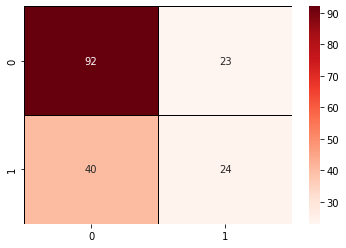

In [10]:
print(classification_report(y_test,pred))

print('\n' + 'Confusion Matrix')

sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',cmap='Reds'
            ,linecolor='black',linewidths=1)

# With Feature Engineering

<AxesSubplot:>

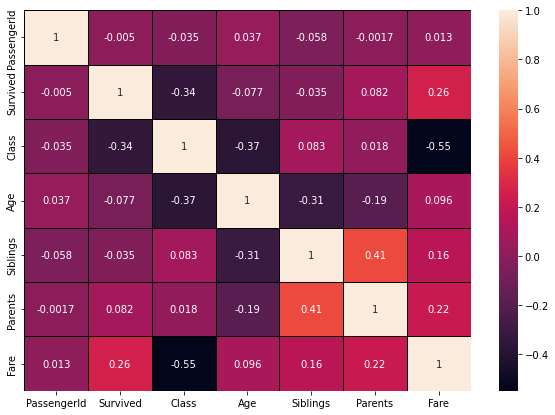

In [11]:
#Use heatmap method to check how each feature correlate with the label
plt.figure(figsize=(10,7))
sns.heatmap(t.corr(),annot=True,linecolor='black',linewidth=1)

### Checking the shape of the data

In [12]:
#We have 891 Rows & 12 columns
t.shape

(891, 12)

### Checking and Handling Null Values

In [13]:
#Checking Null Values
t.isna().sum()

PassengerId      0
Survived         0
Class            0
Name             0
Gender           0
Age            177
Siblings         0
Parents          0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Handling Age Null Values
t['Age'] = t['Age'].fillna(t['Age'].mean())
#We filled it with the mean value of Age

In [15]:
#Handling Cabin values
t.drop('Cabin',axis=1,inplace=True)
#Dropped Cabin due to the high number of null values

In [16]:
#Handling Embarked values
t['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
#Filling missing Embarked values with S
t['Embarked'] = t['Embarked'].fillna('S')
#Filled Embarked with S because it's the mode

In [18]:
#Checking null values after handling them
t.isna().sum()

PassengerId    0
Survived       0
Class          0
Name           0
Gender         0
Age            0
Siblings       0
Parents        0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Checking and handling Outliers

<AxesSubplot:ylabel='Age'>

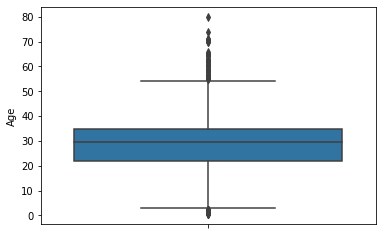

In [19]:
#Using boxplot to find Age outliers
sns.boxplot(y='Age',data=t)

In [20]:
#Dropping Age outliers
t = t[t['Age'] < 60]

<AxesSubplot:ylabel='Fare'>

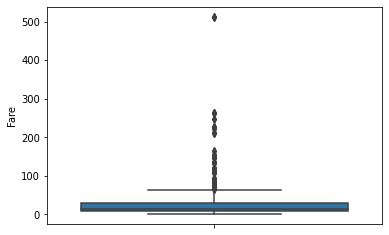

In [21]:
#Checking Fare outliers
sns.boxplot(y='Fare',data=t)

In [22]:
#Dropping Fare outliers
t = t[t['Fare'] < 100]

### One Hot Encoding

In [23]:
#Converting categorical values into binary numerical values
gen = pd.get_dummies(t['Gender'],drop_first=True)
emb = pd.get_dummies(t['Embarked'])

In [24]:
#What does our data look like ?
t['Gender']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Gender, Length: 813, dtype: object

In [25]:
#What does our data look like now ?
gen

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
#Drop original values
t.drop(['Gender','Embarked'],axis=1,inplace=True)

In [27]:
#Concatenate with the encoded values
t = pd.concat([t,gen,emb],axis=1)

In [28]:
#How does our data look right now ?
t.head()

,PassengerId,Survived,Class,Name,Age,Siblings,Parents,Ticket,Fare,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1


### Extracting New Features

In [29]:
#The family size
t['Family'] = t['Siblings'] + t['Parents'] + 1

In [30]:
#Is he alone ?
t['Isalone'] = t['Family'].apply(lambda x: x == 1)

In [31]:
#A child or an adult
t['Isadult'] = t['Age'].apply(lambda x: x > 18)

In [32]:
#First class ?
t['Isfirst'] = t['Class'].apply(lambda x: x == 1)

In [33]:
#Title extraction using regular expression
for Name in t:
    t['Title'] = t['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [34]:
#Convert title to numerical value
title = pd.get_dummies(t['Title'])
t = pd.concat([t,title],axis=1)

In [35]:
t.drop(['Name','Title','Ticket','PassengerId'],axis=1,inplace=True)

In [36]:
#How does our data look right now ?
t

,Survived,Class,Age,Siblings,Parents,Fare,male,C,Q,S,...,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,0,3,22.000000,1,0,7.2500,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,38.000000,1,0,71.2833,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,3,35.000000,0,0,8.0500,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
887,1,1,19.000000,0,0,30.0000,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
888,0,3,29.699118,1,2,23.4500,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
889,1,1,26.000000,0,0,30.0000,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train Test Split

In [37]:
X = t.drop('Survived',axis=1)
y = t['Survived']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=462)

### Model Training

In [39]:
#Using Logistic Regression
lr = LogisticRegression(solver='liblinear',random_state=462)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

### Evaluation

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.83      0.83      0.83        64

    accuracy                           0.87       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163


Confusion Matrix


<AxesSubplot:>

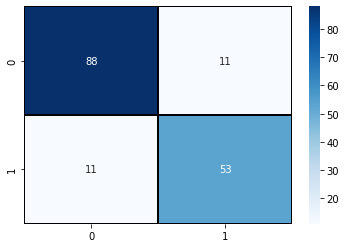

In [40]:
print(classification_report(y_test,pred))

print('\n' + 'Confusion Matrix')

sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',cmap='Blues'
            ,linecolor='black',linewidths=2)

### Feature Importance

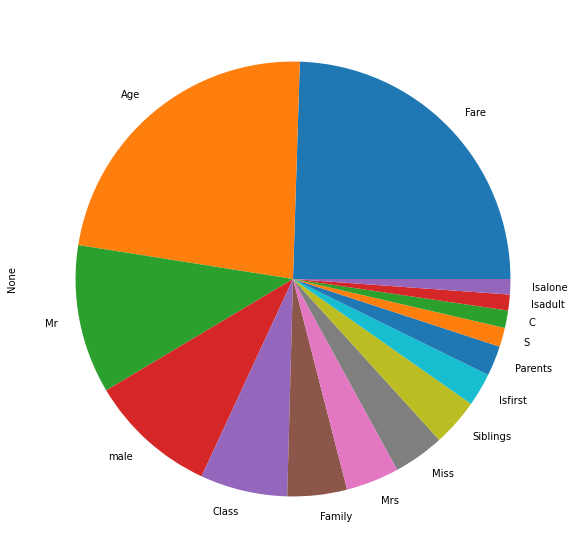

In [41]:
#Fitting the values to a random forest classifier
feat = RandomForestClassifier()
feat.fit(X,y)

#Plotting graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(feat.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='pie')
plt.show()